In [681]:
import matplotlib as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the pickle file into a pandas DataFrame
df1 = pd.read_pickle('spotify_df1_after_data_prep_7.2.25.pkl')
df = pd.read_pickle('spotify_df_after_data_prep_7.2.25.pkl')

In [682]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1656 entries, 12529 to 18035
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   track_id                        1656 non-null   string  
 1   track_artist                    1656 non-null   string  
 2   track_popularity                1656 non-null   int64   
 3   track_album_id                  1656 non-null   string  
 4   playlist_id                     1656 non-null   string  
 5   playlist_genre                  1656 non-null   category
 6   danceability                    1656 non-null   float64 
 7   energy                          1656 non-null   float64 
 8   key                             1656 non-null   int64   
 9   loudness                        1656 non-null   float64 
 10  mode                            1656 non-null   int64   
 11  speechiness                     1656 non-null   float64 
 12  acousticness        

In [683]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1656 entries, 12529 to 18035
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   track_name         1656 non-null   string  
 1   track_album_name   1656 non-null   string  
 2   playlist_name      1656 non-null   string  
 3   playlist_subgenre  1656 non-null   category
dtypes: category(1), string(3)
memory usage: 53.5 KB


In [684]:
# WORD CLOUD

In [685]:
#creating a word cloud using costumers reviews

In [686]:
import nltk
from wordcloud import WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [687]:
#loading the text_df
text=df1['track_name'].astype('string')
text

12529                    juke box hero
20572                   ill youll need
24300                         try love
14108    girlfriend coma 2011 remaster
6865                             raise
                     ...              
1699                      pretty girls
8332                     heart hustler
14082              space age love song
11615              time fall amy grant
18035                  fruta prohibida
Name: track_name, Length: 1656, dtype: string

In [688]:
text.info()

<class 'pandas.core.series.Series'>
Index: 1656 entries, 12529 to 18035
Series name: track_name
Non-Null Count  Dtype 
--------------  ----- 
1656 non-null   string
dtypes: string(1)
memory usage: 25.9 KB


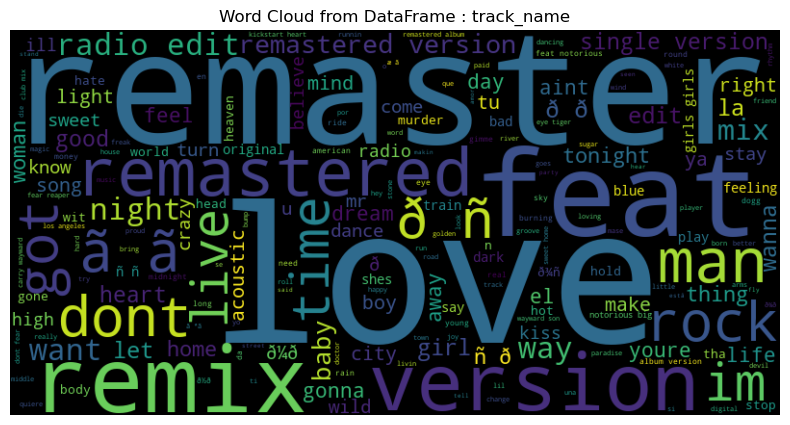

In [689]:
#creating the word cloud
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame : track_name")
plt.show()

In [690]:
#loading the text_df
text=df['track_artist'].astype('string')
text

12529           foreigner
20572             trinere
24300           shinehead
14108              smiths
6865          petey pablo
               ...       
1699                  fun
8332              fat pat
14082      flock seagulls
11615        peter cetera
18035    dragon caballero
Name: track_artist, Length: 1656, dtype: string

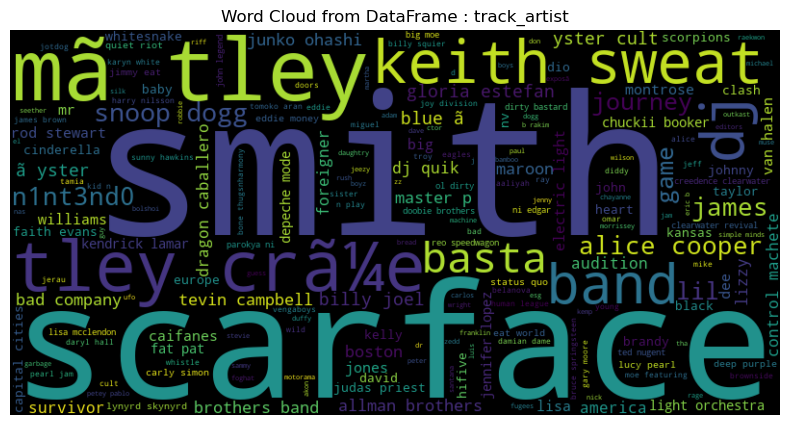

In [691]:
#creating the word cloud
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame : track_artist")
plt.show()

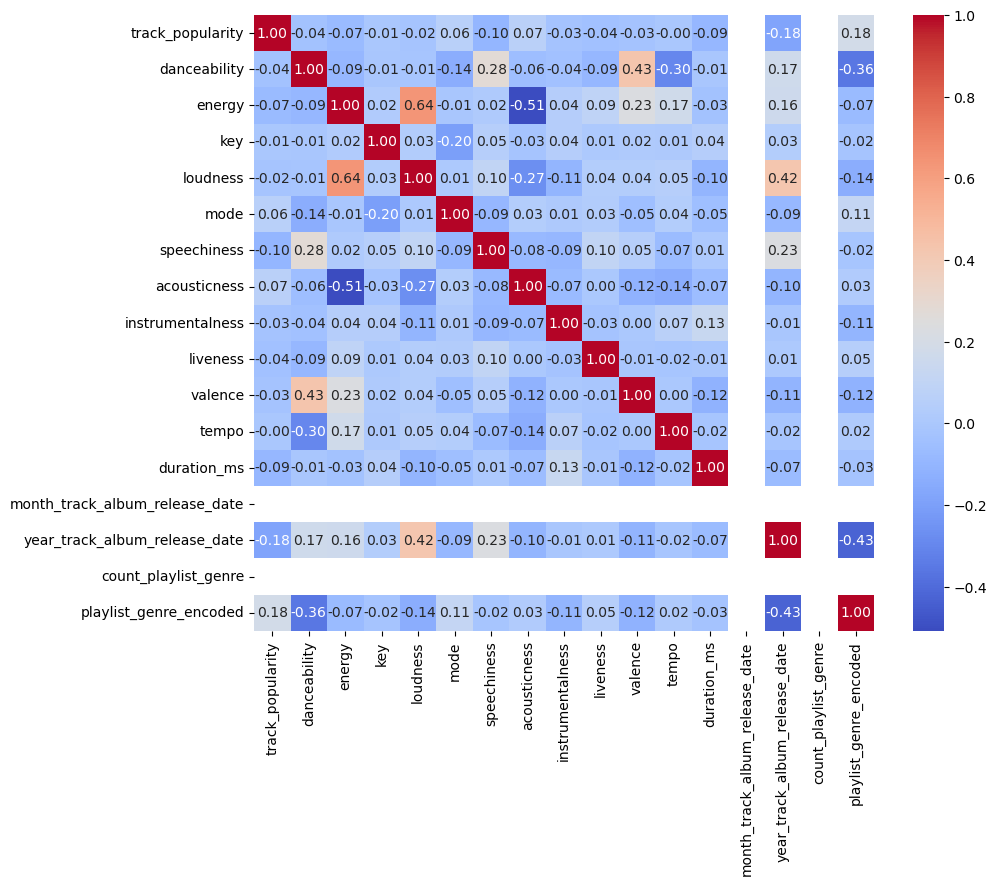

In [692]:
from sklearn.preprocessing import LabelEncoder

# Example: Convert a categorical column to numeric
le = LabelEncoder()
df['playlist_genre_encoded'] = le.fit_transform(df['playlist_genre'])

# Now, you can include this encoded column in the numeric_df if needed
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [693]:
#Feature Importance (Tree-based methods), models like Random Forest or XGBoost to compute feature importance
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming you're predicting a classification target (e.g., playlist_genre)
model = RandomForestClassifier()

# Fit the model (you need to ensure that 'df' has the correct target column)
model.fit(df[[
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'month_track_album_release_date',
    'year_track_album_release_date',
    'count_playlist_genre'
]], df['playlist_genre'])

# Get feature importances
feature_importances = model.feature_importances_
feature_names = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'month_track_album_release_date',
    'year_track_album_release_date',
    'count_playlist_genre'
]

# Create a DataFrame with feature names and their importance values
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the sorted feature importance
print(feature_df)

                           Feature  Importance
13   year_track_album_release_date    0.151679
0                     danceability    0.136245
5                      speechiness    0.129032
10                           tempo    0.081689
1                           energy    0.068923
6                     acousticness    0.068243
11                     duration_ms    0.065933
9                          valence    0.065825
3                         loudness    0.063984
7                 instrumentalness    0.063852
8                         liveness    0.056910
2                              key    0.037039
4                             mode    0.010648
12  month_track_album_release_date    0.000000
14            count_playlist_genre    0.000000


In [694]:
#Recursive Feature Elimination (RFE), recursive feature elimination to iteratively remove the least important features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(df[['danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'month_track_album_release_date',
    'year_track_album_release_date',
    'count_playlist_genre']], df['playlist_genre'])

selected_features = pd.DataFrame({
    'Feature': ['danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'month_track_album_release_date',
    'year_track_album_release_date',
    'count_playlist_genre'],
    'Selected': fit.support_,
    'Ranking': fit.ranking_
})

print(selected_features)


                           Feature  Selected  Ranking
0                     danceability      True        1
1                           energy      True        1
2                              key     False        4
3                         loudness     False        3
4                             mode     False        2
5                      speechiness      True        1
6                     acousticness      True        1
7                 instrumentalness     False        8
8                         liveness     False       11
9                          valence      True        1
10                           tempo     False        5
11                     duration_ms     False        7
12  month_track_album_release_date     False       10
13   year_track_album_release_date     False        6
14            count_playlist_genre     False        9


In [695]:
#Lasso Regularization, Lasso regression can help identify the most important features by applying L1 regularization
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01)
model.fit(df[['danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'month_track_album_release_date',
    'year_track_album_release_date',
    'count_playlist_genre']], df['track_popularity'])

feature_coefficients = pd.DataFrame({
    'Feature': ['danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'month_track_album_release_date',
    'year_track_album_release_date',
    'count_playlist_genre'],
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_coefficients)


                           Feature  Coefficient
0                     danceability     5.152442
4                             mode     1.557535
6                     acousticness     1.404408
3                         loudness     1.023784
2                              key     0.093471
10                           tempo     0.008158
12  month_track_album_release_date     0.000000
14            count_playlist_genre     0.000000
11                     duration_ms    -0.000037
13   year_track_album_release_date    -0.427536
7                 instrumentalness    -0.505615
8                         liveness    -4.124343
9                          valence    -5.589597
1                           energy   -13.789266
5                      speechiness   -14.718344


In [696]:
#Based on the results of the feature importance, the features that have high absolute values for the coefficient (i.e., their impact on the model is more significant) should generally be kept, while features with very low or near-zero values could potentially be dropped.

#Here’s an analysis of the importance:

#High Positive Coefficients:
#danceability (5.15): This feature has a very high positive coefficient, indicating it has a significant influence on the model.
#mode (1.56): This feature also has a positive coefficient and is relatively important.
#acousticness (1.40): Another feature with a decent positive impact.

#Low Coefficients (or Near Zero):
#month_track_album_release_date (0.00): Coefficients near zero generally indicate the feature doesn't contribute much to the model's predictions, so you might consider dropping it.
#count_playlist_genre (0.00): Similar to the previous one, a coefficient close to zero suggests minimal impact.
#duration_ms (-0.00): Again, a coefficient close to zero suggests little to no impact.

#year_track_album_release_date (-0.43): While it has a negative coefficient, it doesn't seem to have a strong influence on the model.

#Negative Coefficients:
#instrumentalness (-0.51): While negative, it still has a significant absolute value.
#liveness (-4.12): This has a large negative value, which means it's influential in the model.
#valence (-5.59): This also has a significant negative value, indicating strong influence.
#energy (-13.79): One of the most important features, with a very large negative impact.
#speechiness (-14.72): Similar to energy, this has a very large negative coefficient, suggesting a strong influence on the model.

#Conclusion:
#I should definitely keep the features with high absolute coefficients (both positive and negative), as they have significant impact on the model. Based on this, the features you should consider keeping include:

#danceability (5.15)
#mode (1.56)
#acousticness (1.40)
#energy (-13.79)
#speechiness (-14.72)
#instrumentalness (-0.51)
#liveness (-4.12)
#valence (-5.59)

#Features to Consider Dropping (with low or near-zero coefficients):
#month_track_album_release_date (0.00)
#count_playlist_genre (0.00)
#duration_ms (-0.00)
#year_track_album_release_date (-0.43)#

In [697]:
# Drop the specified features from the DataFrame
df2 = df.drop(columns=['month_track_album_release_date', 'count_playlist_genre', 'duration_ms'])

# Display the updated DataFrame with the dropped features
df2

,track_id,track_artist,track_popularity,track_album_id,playlist_id,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_track_album_release_date,playlist_genre_encoded
12529,00qoe7ojrl0bpyiciwezb2,foreigner,67,2pw51hagvwpta3ayl2wvuu,37i9dqzf1dxdoeft9zx0dh,rock,0.357,0.653,9,-5.554,1,0.0654,0.082800,0.000000,0.0844,0.522,176.647,1981,5
20572,01qhvhvkgqzo861kl3ghfx,trinere,27,5bc8h7zzduifrb8pjj4utm,1oreeujywpqv2ox68bvppa,latin,0.720,0.814,8,-8.195,0,0.0546,0.007940,0.000290,0.0619,0.770,123.551,1997,1
24300,01gsilj7mznurr7gwajrgt,shinehead,32,3pcdxm6bp0nrofqdykznwp,0dminkymnnotwvefamsnzb,r&b,0.819,0.497,0,-15.495,0,0.1130,0.194000,0.000000,0.0761,0.752,103.307,1992,3
14108,01q4ccxbvplcwz1fpifaem,smiths,56,7jfexk2w5adi25njkn0ugg,7rpsfdtqizyit4pvzq4c0c,rock,0.680,0.626,7,-8.519,1,0.0255,0.126000,0.000001,0.0995,0.960,104.333,1987,5
6865,02gwpancasvl82yc7y2hmn,petey pablo,54,5hrshdifyk7qxstjkb0sjz,4lcywqdozpfcbzrcbi3fow,rap,0.735,0.844,1,-5.215,1,0.1670,0.142000,0.000000,0.3190,0.742,156.069,2001,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,7zhrclhhkdkvdswr0ckdlb,fun,42,6csgmett9h9nzcqsmd4dfq,1ygwqas1s77nzieih4arkn,pop,0.646,0.787,0,-4.654,1,0.0602,0.258000,0.000000,0.1990,0.773,131.036,2009,2
8332,7zkzwfo5j4ka2vbpqhfqwp,fat pat,0,2rzvfboumxkvqsr0wdhmgr,1qj66s6ybzgxmuavuyrhbo,rap,0.735,0.652,0,-5.257,1,0.2740,0.026600,0.000000,0.1690,0.684,168.403,2001,4
14082,7zsai7ae6dpvepn8mkskvz,flock seagulls,50,48ajnqhmdkrgvwjo0ugmiv,7rpsfdtqizyit4pvzq4c0c,rock,0.447,0.744,2,-4.613,1,0.0311,0.000036,0.106000,0.2100,0.552,139.959,1981,5
11615,7zsddsilks515d0tzgm64x,peter cetera,57,1o2sedklsshroeyyguqmnb,0xoik4m26aeysd61e5nsvw,rock,0.656,0.347,9,-13.398,1,0.0280,0.488000,0.002210,0.0645,0.368,118.288,1986,5


In [698]:
df1

,track_name,track_album_name,playlist_name,playlist_subgenre
12529,juke box hero,4 expanded,classic rock drive,classic rock
20572,ill youll need,night,80s freestyledisco dance party set crossfade 4...,latin hip hop
24300,try love,sidewalk university,90s new jack swing,new jack swing
14108,girlfriend coma 2011 remaster,strangeways come,permanent wave,permanent wave
6865,raise,diary sinner 1st entry,southern hip hop,southern hip hop
...,...,...,...,...
1699,pretty girls,aim ignite,pop punk posthardcore,post-teen pop
8332,heart hustler,greatest hits,3rd coast classics,southern hip hop
14082,space age love song,80s,permanent wave,permanent wave
11615,time fall amy grant,solitude solitaire,80s pop rock hits album tracks,album rock


In [699]:
# Add the specified columns to the existing df1 from the original df
df1['track_album_id'] = df2['track_album_id']
df1['playlist_genre'] = df2['playlist_genre']
df1['playlist_id'] = df2['playlist_id']

# Remove the columns that were moved (from df1)
df2 = df2.drop(columns=['track_album_id', 'playlist_genre', 'playlist_id'])

In [700]:
df2

,track_id,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_track_album_release_date,playlist_genre_encoded
12529,00qoe7ojrl0bpyiciwezb2,foreigner,67,0.357,0.653,9,-5.554,1,0.0654,0.082800,0.000000,0.0844,0.522,176.647,1981,5
20572,01qhvhvkgqzo861kl3ghfx,trinere,27,0.720,0.814,8,-8.195,0,0.0546,0.007940,0.000290,0.0619,0.770,123.551,1997,1
24300,01gsilj7mznurr7gwajrgt,shinehead,32,0.819,0.497,0,-15.495,0,0.1130,0.194000,0.000000,0.0761,0.752,103.307,1992,3
14108,01q4ccxbvplcwz1fpifaem,smiths,56,0.680,0.626,7,-8.519,1,0.0255,0.126000,0.000001,0.0995,0.960,104.333,1987,5
6865,02gwpancasvl82yc7y2hmn,petey pablo,54,0.735,0.844,1,-5.215,1,0.1670,0.142000,0.000000,0.3190,0.742,156.069,2001,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,7zhrclhhkdkvdswr0ckdlb,fun,42,0.646,0.787,0,-4.654,1,0.0602,0.258000,0.000000,0.1990,0.773,131.036,2009,2
8332,7zkzwfo5j4ka2vbpqhfqwp,fat pat,0,0.735,0.652,0,-5.257,1,0.2740,0.026600,0.000000,0.1690,0.684,168.403,2001,4
14082,7zsai7ae6dpvepn8mkskvz,flock seagulls,50,0.447,0.744,2,-4.613,1,0.0311,0.000036,0.106000,0.2100,0.552,139.959,1981,5
11615,7zsddsilks515d0tzgm64x,peter cetera,57,0.656,0.347,9,-13.398,1,0.0280,0.488000,0.002210,0.0645,0.368,118.288,1986,5


In [730]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Check if 'track_artist' exists in df2
if 'track_artist' in df2.columns:
    # Label encode 'track_artist' in df2 and store it in a new column 'track_artist_encoded'
    df2['track_artist_encoded'] = label_encoder.fit_transform(df2['track_artist'])

    # Add the original 'track_artist' from df2 to df1 (without encoding)
    df1['track_artist'] = df2['track_artist']

    # Remove the 'track_artist' column from df2 after copying to df1
    df2 = df2.drop(columns=['track_artist'])

In [732]:
df1.head()

,track_name,track_album_name,playlist_name,playlist_subgenre,track_album_id,playlist_genre,playlist_id,track_artist
12529,juke box hero,4 expanded,classic rock drive,classic rock,2pw51hagvwpta3ayl2wvuu,rock,37i9dqzf1dxdoeft9zx0dh,foreigner
20572,ill youll need,night,80s freestyledisco dance party set crossfade 4...,latin hip hop,5bc8h7zzduifrb8pjj4utm,latin,1oreeujywpqv2ox68bvppa,trinere
24300,try love,sidewalk university,90s new jack swing,new jack swing,3pcdxm6bp0nrofqdykznwp,r&b,0dminkymnnotwvefamsnzb,shinehead
14108,girlfriend coma 2011 remaster,strangeways come,permanent wave,permanent wave,7jfexk2w5adi25njkn0ugg,rock,7rpsfdtqizyit4pvzq4c0c,smiths
6865,raise,diary sinner 1st entry,southern hip hop,southern hip hop,5hrshdifyk7qxstjkb0sjz,rap,4lcywqdozpfcbzrcbi3fow,petey pablo


In [734]:
df2.head()

,track_id,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_track_album_release_date,playlist_genre_encoded,track_artist_encoded
12529,00qoe7ojrl0bpyiciwezb2,67,0.357,0.653,9,-5.554,1,0.0654,0.08280,0.000000,0.0844,0.522,176.647,1981,5,307
20572,01qhvhvkgqzo861kl3ghfx,27,0.720,0.814,8,-8.195,0,0.0546,0.00794,0.000290,0.0619,0.770,123.551,1997,1,829
24300,01gsilj7mznurr7gwajrgt,32,0.819,0.497,0,-15.495,0,0.1130,0.19400,0.000000,0.0761,0.752,103.307,1992,3,744
14108,01q4ccxbvplcwz1fpifaem,56,0.680,0.626,7,-8.519,1,0.0255,0.12600,0.000001,0.0995,0.960,104.333,1987,5,761
6865,02gwpancasvl82yc7y2hmn,54,0.735,0.844,1,-5.215,1,0.1670,0.14200,0.000000,0.3190,0.742,156.069,2001,4,659
